# Ejercicio 1

- Crea un array de 450 enteros aleatorios entre -10 y 10.

In [1]:
import numpy as np

array450 = np.random.randint(-10, 10, 450, int)

- Redimensiónalo como matriz de 5x70. ¿Hay algún problema? Si lo hay, corrígelo.

In [2]:
array450.reshape((5,90))

array([[  4,   4,   6,   0,  -3,   9,  -4,  -6,  -3,  -9,  -3,   3,   3,
          7,   4,  -9,  -4,   3,   2,   9,   1,   1,  -2,  -7,   0,  -2,
         -6,   5,   4,  -9,  -5,   0,   5,   6,   6,  -9,   3,  -1,  -1,
          7,   7,   7,  -1,   1,   5,  -7, -10,   4,   5,   5,  -8,   1,
          3,   6,   3,   7,   3,   4,   0,  -1,  -1,   8,   5,  -1,  -5,
         -2,   8,   8, -10,  -3,   0,   7,  -7,  -1,  -2,  -1,   0, -10,
          2,  -5,  -3, -10,   5,  -3,  -3,   3,   5,   7,   6,   8],
       [  6,  -3,   2,   7,  -7,  -3,   6,  -3,   9,   7,  -3,  -4,   5,
         -9,   2,  -3,   5,  -5,  -4,   9,  -7,  -1,  -1,   3,   7,   2,
          6,   7,  -1,   0,   4,  -1,   6,   7,   7,  -1,  -9,  -4,   6,
         -5,   8,   2,   0,  -3,   9,  -9,  -5,  -4,  -9,  -6,   2,   6,
          9,  -4, -10,   3,  -6,   9,   3,   9,  -9,  -5,  -8, -10,  -3,
         -2,   6,   1,  -3, -10,   4,  -9,  -9,  -5,  -3,   3,   4, -10,
          4,   8,   9,   6,   4,   3, -10,   7,   2,  -

- Obtén con una función que encuentres en las bibliotecas de NumPy los datos no duplicados.

In [3]:
unique = np.unique(array450)
print(unique)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


- Sobre los datos no duplicados, obtén la media y los cuartiles, buscando las funciones adecuadas.


In [4]:
average = np.average(unique)
quartiles = np.percentile(unique, [25, 50, 75])
print(average)
print(quartiles)

-0.5
[-5.25 -0.5   4.25]


- Dibuja el histograma y los cuartiles del array. Nota: para dibujar líneas se pueden utilizar funciones como vlines().

In [5]:
import matplotlib.pyplot as plt

plt.hist(array450, bins=20, alpha=0.75)
plt.vlines(quartiles, 0, 35)


# Ejercicio 2

- Crea dos arrays de 100 elementos con números aleatorios de distribuciones diferentes, pero en un rango de valores similar. 

In [6]:
array1 = np.random.normal(0, 0.1, 100)
array2 = np.random.uniform(0, 1, 100)

- Dibuja sus histogramas y compáralos.

(array([ 4.,  4.,  6.,  8.,  7.,  9.,  3., 10.,  3.,  5.,  5.,  4.,  3.,
         3.,  3.,  6.,  5.,  3.,  4.,  5.]),
 array([0.03041752, 0.07887832, 0.12733911, 0.17579991, 0.2242607 ,
        0.2727215 , 0.32118229, 0.36964309, 0.41810388, 0.46656468,
        0.51502547, 0.56348627, 0.61194706, 0.66040786, 0.70886865,
        0.75732945, 0.80579024, 0.85425104, 0.90271184, 0.95117263,
        0.99963343]),
 <a list of 20 Patch objects>)

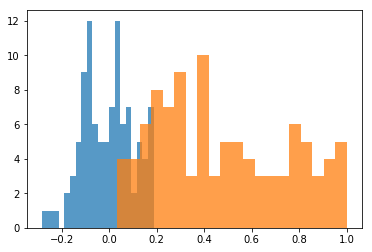

In [7]:
plt.hist(array1, bins=20, alpha=0.75)
plt.hist(array2, bins=20, alpha=0.75)

- ¿Con qué método estadístico podrías contrastar si las dos muestras provienen de la misma distribución? ¿En qué paquete del stack científico de Python podría estar?

In [8]:
from scipy.stats import ks_2samp
ks_2samp(array1, array2)

Ks_2sampResult(statistic=0.86, pvalue=8.65510764431275e-34)

En la libreria scipy siguiendo la formula K-S: Si estadística de K-S es pequeña o el valor 'p-value' es alto, entonces no podemos rechazar la hipótesis de que las dos muestras tengan la misma distribución.

# Ejercicio 3

Si no lo conocías, lee el ejemplo de qué es una media móvil aquí: http://www.investopedia.com/terms/m/movingaverage.asp (consideramos solo las medias móviles simples)

- Genera un array de supuesta cotizaciones de un valor de la bolsa duante un período. Nota: Puedes simularlo con un “random walk” a partir de un valor de cotización inicial

In [11]:
dims = 1
step_n = 200
step_set = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
origin = np.zeros((1,dims))

# Simulate steps in 1D

step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
randomWalk = np.concatenate([origin, steps]).cumsum(0)
start = randomWalk[:1]
stop = randomWalk[-1:]


- Busca una función en el stack científico de Python que implemente la media móvil y aplícalo a los datos generados.


In [12]:
np.cumsum(randomWalk)

array([ 0.0000e+00, -2.5000e-01,  0.0000e+00, -7.5000e-01, -1.2500e+00,
       -7.5000e-01,  7.5000e-01,  1.2500e+00,  2.7500e+00,  3.2500e+00,
        4.5000e+00,  6.5000e+00,  9.2500e+00,  1.1000e+01,  1.2500e+01,
        1.3750e+01,  1.6000e+01,  1.8500e+01,  2.0000e+01,  2.2500e+01,
        2.4000e+01,  2.4500e+01,  2.4500e+01,  2.4750e+01,  2.5750e+01,
        2.7500e+01,  2.9000e+01,  2.9750e+01,  3.0500e+01,  3.0250e+01,
        3.0500e+01,  3.0000e+01,  2.9750e+01,  3.0250e+01,  2.9750e+01,
        2.9500e+01,  2.8750e+01,  2.7500e+01,  2.6250e+01,  2.4250e+01,
        2.3000e+01,  2.0750e+01,  1.8750e+01,  1.7250e+01,  1.5000e+01,
        1.3500e+01,  1.2750e+01,  1.2250e+01,  1.2750e+01,  1.3500e+01,
        1.5250e+01,  1.6000e+01,  1.6500e+01,  1.7250e+01,  1.9000e+01,
        2.1500e+01,  2.4500e+01,  2.6750e+01,  3.0000e+01,  3.4000e+01,
        3.8000e+01,  4.1750e+01,  4.4500e+01,  4.6750e+01,  4.9000e+01,
        5.1000e+01,  5.2500e+01,  5.4250e+01,  5.6500e+01,  5.87

- (**) Ahora haz tu propia implementación de la media móvil utilizando arrays de NumPy. 

In [13]:
def simple_moving_average(values, previous_interval):
    sma = []
    for i in range(1, len(values)):
        if i > previous_interval:
            sma.append(np.sum(values[i - previous_interval : i]))
        else :
            sma.append(0)
    return sma


- Compara la eficiencia de tu versión y la de NumPy.


In [14]:
%timeit np.cumsum(randomWalk)
%timeit simple_moving_average(randomWalk, 3)

2.6 µs ± 46.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
675 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- (**) Investiga cómo obtener datos reales de un valor de la bolsa a partir de Yahoo Financials (si no lo consigues por programa, puedes descargarlo a un fichero a mano y leerlo después), y aplica la media móvil.

# Ejercicio 4
NumPy tiene una categoría de funciones para grabar y recuperar arrays de disco:  https://docs.scipy.org/doc/numpy/reference/routines.io.html   

A partir del siguiente código:
```
import numpy as np
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)
b
array([ 0.52284741, 0.23829581, -0.49767523, 0.54278876, 0.27790099,
1.94402675, -0.3543395 , 0.57639513, -0.80058146, -0.89837096])
```

In [35]:
def create_arrays(arrays_size = 10):
    a = np.random.uniform(size = arrays_size)
    b = np.random.normal(size = arrays_size)
    return a, b

- Guardar los arrays anteriores en formato específico de NumPy comprimido y formato de texto (sin comprimir).

In [36]:
a, b = create_arrays(10)
np.savetxt("fileA.txt", a)
np.savetxt("fileB.txt", b)

- Comparar las diferencias de espacio en disco desde el mismo Notebook, y ver sus contenidos con el comando head del sistema operativo.

In [37]:
%ls -sh *.txt


4,0K fileA.txt  4,0K fileBoth.txt  4,0K fileB.txt


- Cargarlos de nuevo en memoria con nombres de variable diferentes.

In [38]:
loadedA = np.loadtxt("fileA.txt")
loadedB = np.loadtxt("fileB.txt")

loadedA, loadedB

(array([0.28574091, 0.74682079, 0.70061494, 0.61298419, 0.34300928,
        0.39172586, 0.85143528, 0.54879167, 0.2116721 , 0.35532689]),
 array([ 1.24566977,  0.58570255,  0.2908381 , -1.94012857, -0.29851172,
        -0.50981952,  0.06387277,  2.07384303, -0.55683298,  0.17862209]))

- (opcional) Guardar los dos arrays en un solo fichero de texto y recuperarlos de nuevo. Pista: utilizar tuplas.

In [39]:
np.savetxt("fileBoth.txt", (a, b))
loadedBothA, loadedBothB = np.loadtxt("fileBoth.txt")
loadedBothA, loadedBothB

(array([0.28574091, 0.74682079, 0.70061494, 0.61298419, 0.34300928,
        0.39172586, 0.85143528, 0.54879167, 0.2116721 , 0.35532689]),
 array([ 1.24566977,  0.58570255,  0.2908381 , -1.94012857, -0.29851172,
        -0.50981952,  0.06387277,  2.07384303, -0.55683298,  0.17862209]))

# Ejercicio 5
SciPy tiene un buen número de distribuciones de probabilidad conocidas implementadas, continuas y discretas: https://docs.scipy.org/doc/scipy/reference/stats.html  

Por ejemplo, podemos trabajar con distribuciones normales de la siguiente forma.
```
from scipy.stats import norm
# Creamos una distribución normal con media 5.
mi_normal = norm(5)
# Obtenemos los percentiles de los extremos de la distribución:
x = np.linspace(mi_normal.ppf(0.001), mi_normal.ppf(0.999), 100)
# Obtenemos los estadísticos comunes:
m, v = mi_normal.stats(moments='mv')
print(m, v)
# Dibujamos la función
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, mi_normal.pdf(x), 'r-', lw=3)
 (array(5.0), array(1.0))
``` 

Podemos generar a su vez datos aleatorios para simular una muestra de la siguiente manera.
```
r = mi_normal.rvs(size=1000)
plt.hist(r, normed=True, alpha=0.2, bins="auto")
```

Queremos ahora estudiar la distribución de Pareto. Podemos ver su forma en Wikipedia:
https://es.wikipedia.org/wiki/Distribución_de_Pareto 


/home/portiz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([4.5806028 , 3.65680846, 4.97056724, 4.25655794, 5.18072345,
       5.13060334, 4.36330413, 5.09589047, 6.47641995, 6.54369658,
       5.24000306, 5.41771373, 4.94399595, 4.92287111, 6.50172317,
       5.40465127, 5.09449674, 3.22156841, 4.83272461, 4.54498512,
       6.51443039, 5.56621146, 7.82757964, 4.57483544, 5.28896241,
       4.4835917 , 4.08183938, 6.55444912, 4.54951772, 5.88152416,
       5.4251697 , 5.0057237 , 4.31460633, 4.46414486, 5.31298539,
       4.19566638, 6.03871224, 4.38729732, 5.49670994, 4.18475319,
       3.35463552, 5.76346682, 5.57736389, 4.88057337, 6.02421498,
       4.09247918, 5.5764394 , 2.89642705, 4.38415105, 3.97844702,
       6.34693972, 5.1832098 , 4.70857174, 5.72979963, 3.83289259,
       4.91166669, 4.6542304 , 5.37583937, 5.43499076, 5.67754485,
       5.51253707, 4.40287025, 3.40954734, 3.88320638, 3.22589901,
       4.76993975, 4.67701034, 3.82105799, 4.39857526, 7.82759805,
       4.83058772, 5.86638819, 5.53028721, 4.39108655, 6.26472

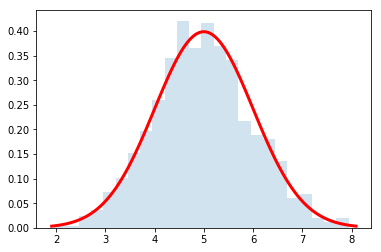

In [46]:
from scipy.stats import norm

def normal_distribution(mean = 5):
    mi_normal = norm(mean)
    x = np.linspace(mi_normal.ppf(0.001), mi_normal.ppf(0.999), 100)
    m, v = mi_normal.stats(moments='mv')
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(x, mi_normal.pdf(x), 'r-', lw = 3)
    return mi_normal

def random_data(distribution, size = 1000):
    r = distribution.rvs(size)
    plt.hist(r, normed=True, alpha=0.2, bins="auto")
    return r

mi_normal = normal_distribution()
random_data(mi_normal)

- Representar las funciones de densidad y de probabilidad similares a las de Wikipedia.

- Hallar el percentil del 80% con k=1. Razonar sobre el Principio de Pareto, se puede consultar aquí: https://en.wikipedia.org/wiki/Pareto_principle 

In [48]:
np.percentile(mi_normal, 0.80)

TypeError: unsupported operand type(s) for *: 'rv_frozen' and 'float'

# Ejercicio 6

Si no encontrásemos la distribución en las bibliotecas de ScyPy pero la conocemos ("sabemos la fórmula"), siempre podemos generar los datos aleatorios generando un array con los datos en el rango en que está definida, y después tomando aleatoriamente un número de elementos de allí ("con
reemplazo").
Vamos a pensar si tenemos esta función: f(t) definida por: 

\begin{equation*}
F(E) = \
{n \choose k} p^k (1-p)^{ n-k} 
\end{equation*}



0, t < 0
2t / (1+t2)2, t>= 0

- Dibujar la función en el rango [0, 10].

- Generar una muestra aleatoria de la misma.

- Dibujar esa muestra y su histograma.